### Package installation

In [1]:
# !pip install psycopg2

In [3]:
#pip install openpyxl

### Package call

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

### Load

***Connect to the database***

In [2]:

class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Rsjintu8",
                                           host = "localhost", #"127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

successfully connected to database


### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

#### division wise total sale price 

In [4]:
cur = con.cursor()
select_stmt = "SELECT  division, SUM(f.total_price) as total_sale_price "\
"FROM ecomdb.fact_table as f "\
"inner JOIN ecomdb.store_dim as s ON s.store_key = f.store_key "\
"GROUP BY CUBE(s.division) "
cur.execute(select_stmt)
records = cur.fetchall()
records

[(None, Decimal('105401435.75')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('BARISAL', Decimal('7520343.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25'))]

In [5]:
division_wise_total_sale_price_df = pd.DataFrame(list(records), columns=['Division', 'Total sale price'])
division_wise_total_sale_price_df

,Division,Total sale price
0,None,105401435.75
1,RAJSHAHI,12099196.00
2,DHAKA,40764619.75
3,CHITTAGONG,19763595.00
4,BARISAL,7520343.75
5,KHULNA,11311610.50
6,RANGPUR,8429836.50
7,SYLHET,5512234.25


In [6]:
division_wise_total_sale_price_df['Division'].isnull().sum()

1

In [7]:
division_wise_total_sale_price_df = division_wise_total_sale_price_df.dropna()
division_wise_total_sale_price_df

,Division,Total sale price
1,RAJSHAHI,12099196.00
2,DHAKA,40764619.75
3,CHITTAGONG,19763595.00
4,BARISAL,7520343.75
5,KHULNA,11311610.50
6,RANGPUR,8429836.50
7,SYLHET,5512234.25


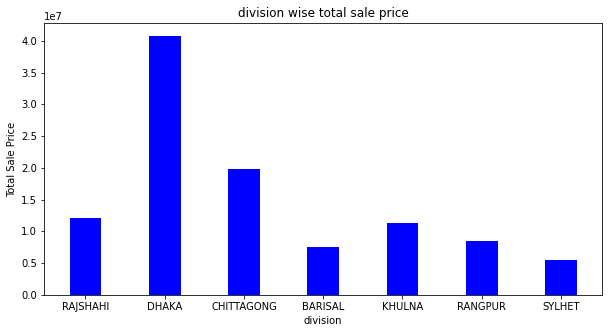

In [8]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(division_wise_total_sale_price_df['Division'], division_wise_total_sale_price_df['Total sale price'], color ='blue',
        width = 0.4)
 
plt.xlabel("division")
plt.ylabel("Total Sale Price")
plt.title("division wise total sale price")
plt.show()

Dhaka Has the highest Total sale price compared to the other divisions.

# Q2: Find the bank wise total_sale_price joining fact table and respective dimension table

#### Total sale price in each bank

In [9]:
con = PostgresConnection().getConnection()

successfully connected to database


In [10]:
cur = con.cursor()
select_stmt = "SELECT  t.bank_name, SUM(f.total_price) as total_sale_price "\
"FROM ecomdb.fact_table as f "\
"inner JOIN ecomdb.trans_dim as t ON t.payment_key = f.payment_key "\
"GROUP BY CUBE(t.bank_name) "\
"ORDER BY total_sale_price asc"

cur.execute(select_stmt)
records = cur.fetchall()
records

[('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Pubali Bank Limited', Decimal('2682787.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Shimanto Bank Ltd', Decimal('2685805.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Bkash', Decimal('2689352.50')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Premier Bank Limited', Decimal('2690828.00')),
 ('Southeast Bank Limited', Decimal('2691275.75')),
 ('NRB Commercial Bank Ltd', Decimal('2692016.25')),
 ('One Bank Limited', Decimal('2692043.25')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('United Commercial Bank Ltd', Decimal('2696854.75')),
 ('National Bank Limited', Decimal('2697294.25')),
 ('Prime Bank Limited', Decimal('2698896.50')),
 ('Nagad', Decimal('2699554.50')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('NRB Gl

In [11]:
bank_wise_total_sale_price_df = pd.DataFrame(list(records), columns=['Bank_name', 'Total_sale_price'])
bank_wise_total_sale_price_df = bank_wise_total_sale_price_df.dropna()
bank_wise_total_sale_price_df

,Bank_name,Total_sale_price
0,Mutual Trust Bank Limited,2670030.50
1,Mercantile Bank Limited,2676578.50
2,Pubali Bank Limited,2682787.50
3,Community Bank Bangladesh Limited,2685751.50
4,Shimanto Bank Ltd,2685805.25
5,Bank Asia Limited,2687142.75
6,Eastern Bank Limited,2687182.25
7,Midland Bank Limited,2688430.25
8,Bkash,2689352.50
9,Jamuna Bank Limited,2689886.50


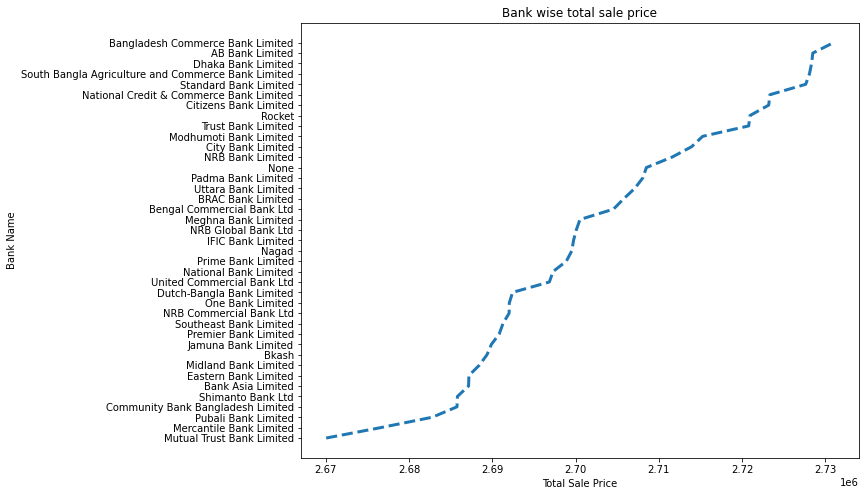

In [12]:
# # Creating histogram
# fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist(bank_wise_total_sale_price_df.Total_sale_price, bins = [0, 25, 50, 75, 100])
 
# # Show plot
# plt.show()

# line plot
fig = plt.figure(figsize = (10, 8))
plt.plot(bank_wise_total_sale_price_df.Total_sale_price,bank_wise_total_sale_price_df.Bank_name, linestyle = 'dashed', linewidth = '3')
plt.xlabel("Total Sale Price")
plt.ylabel("Bank Name")
plt.title("Bank wise total sale price")
plt.show()

Thus, Bangladesh Commerce Bank Limited has the highest total sale price which is	2730999.25

# Q3: Total sales in Barisal

In [13]:
con = PostgresConnection().getConnection()

successfully connected to database


In [14]:
cur = con.cursor()
select_stmt = "SELECT  s.division, SUM(f.total_price) as total_sale_price "\
"FROM ecomdb.fact_table as f "\
"inner JOIN ecomdb.store_dim as s ON s.store_key = f.store_key "\
"WHERE s.division ='BARISAL' "\
"GROUP BY CUBE(s.division)"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BARISAL', Decimal('7520343.75')), (None, Decimal('7520343.75'))]

In [15]:
total_sale_price_in_Barishal_df = pd.DataFrame(list(records), columns=['Division', 'Total_sale_price'])
total_sale_price_in_Barishal_df = total_sale_price_in_Barishal_df.dropna()
total_sale_price_in_Barishal_df

,Division,Total_sale_price
0,BARISAL,7520343.75


# Q4: Total sales in 2015

In [16]:
con = PostgresConnection().getConnection()

successfully connected to database


In [17]:
cur = con.cursor()
select_stmt = "SELECT  t.year, SUM(f.total_price) as total_sale_price "\
"FROM ecomdb.fact_table as f "\
"inner JOIN ecomdb.time_dim as t ON t.time_key = f.time_key "\
"WHERE t.year =2015 "\
"GROUP BY CUBE(t.year)"
cur.execute(select_stmt)
records = cur.fetchall()
records

[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

In [18]:
total_sale_price_in_2015_df = pd.DataFrame(list(records), columns=['Year', 'Total_sale_price'])
total_sale_price_in_2015_df = total_sale_price_in_2015_df.dropna()
total_sale_price_in_2015_df

,Year,Total_sale_price
0,2015.0,15095720.25


# Q5: Total sales of Barisal in 2015

In [19]:
con = PostgresConnection().getConnection()

successfully connected to database


In [20]:
cur = con.cursor()
select_stmt = "SELECT  t.year, s.division, SUM(f.total_price) as total_sale_price "\
"FROM ecomdb.fact_table as f "\
"JOIN ecomdb.time_dim as t ON t.time_key = f.time_key "\
"JOIN ecomdb.store_dim as s ON s.store_key = f.store_key "\
"WHERE t.year =2015 and s.division = 'BARISAL' "\
"GROUP BY CUBE(t.year, s.division)"
cur.execute(select_stmt)
records = cur.fetchall()
records

[(2015, 'BARISAL', Decimal('1076902.75')),
 (2015, None, Decimal('1076902.75')),
 (None, None, Decimal('1076902.75')),
 (None, 'BARISAL', Decimal('1076902.75'))]

In [21]:
total_sale_price_BARISAL_in_2015_df = pd.DataFrame(list(records), columns=['Year', 'Division', 'Total_sale_price'])
total_sale_price_BARISAL_in_2015_df = total_sale_price_BARISAL_in_2015_df.dropna()
total_sale_price_BARISAL_in_2015_df

,Year,Division,Total_sale_price
0,2015.0,BARISAL,1076902.75


# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [146]:
con = PostgresConnection().getConnection()

successfully connected to database


In [147]:
cur = con.cursor()
select_stmt = "SELECT s.store_key as store_key, i.item_name as item_name, sum(f.quantity) as quantity_sales_for_each_item "\
"FROM ecomdb.fact_table as f "\
"JOIN ecomdb.store_dim as s on s.store_key=f.store_key "\
"JOIN ecomdb.item_dim as i on i.item_key=f.item_key "\
"GROUP BY (s.store_key, i.item_name) "\
"ORDER BY s.store_key, sum(f.quantity) desc"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('S0001', 'Pepsi - 12 oz cans', 92),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', 90),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', 78),
 ('S0001', 'Waterloo Sparkling Lime 12oz', 70),
 ('S0001', 'Njoy Sugar Canister 22 oz', 69),
 ('S0001', 'Vita Coconut Water 10oz ', 68),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', 67),
 ('S0001', 'Sprite - 12 oz cans', 64),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', 63),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', 62),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', 61),
 ('S0001', 'A&W Root Beer - 12 oz cans', 60),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', 60),
 ('S0001', 'Dark Chocolate Mint Patties', 60),
 ('S0001', 'Large Trash Bags Black 33 gal', 59),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', 59),
 ('S0001', 'Kellogg Fun Mix Cheez it, Prngls, Fam Amos', 58),
 ('S0001', 'Quaker Instant Oatmeal Maple Brn Sugar', 57),
 ('S0001', 'Frito Bold Flavors Variety', 56),
 ('S0001', 'Keebler Cookie & Cr

In [148]:
top_three_product_per_store_df = pd.DataFrame(list(records), columns=['store_key', 'item_name', 'quantity_sales_for_each_item'])
top_three_product_per_store_df = top_three_product_per_store_df.dropna()
top_three_product_per_store_df

,store_key,item_name,quantity_sales_for_each_item
0,S0001,Pepsi - 12 oz cans,92
1,S0001,Muscle Milk Protein Shake Van. 11oz,90
2,S0001,Hefty Supreme Foam Plates 6 inch,78
3,S0001,Waterloo Sparkling Lime 12oz,70
4,S0001,Njoy Sugar Canister 22 oz,69
...,...,...,...
187109,S0099,Kind Bars Mini Variety Pack 0.7 oz,5
187110,S0099,Paper Plates 8.5 inch Ultra Strong,4
187111,S0099,Fuze Iced Tea,4
187112,S0099,Pringles Snak Stacks Variety,3


In [149]:
top_three_product_per_store_df = top_three_product_per_store_df.set_index('item_name').groupby("store_key")['quantity_sales_for_each_item'].nlargest(3).reset_index()
top_three_product_per_store_df

,store_key,item_name,quantity_sales_for_each_item
0,S0001,Pepsi - 12 oz cans,92
1,S0001,Muscle Milk Protein Shake Van. 11oz,90
2,S0001,Hefty Supreme Foam Plates 6 inch,78
3,S0002,Planters Nut-trition 1.5 oz,83
4,S0002,Altoids Small Packs Variety,80
...,...,...,...
2173,S0098,Cliff Builders Protein Bar Variety Pack,84
2174,S0098,Pepsi - 12 oz cans,79
2175,S0099,Pepsi - 12 oz cans,93
2176,S0099,Diet Coke - 12 oz cans,87


In [153]:
# Figure Size
# fig, ax = plt.subplots(figsize =(16, 56))
# figsize=(15,10)
# plt.figure(figsize=(16,16))
# ax = top_three_product_per_store_df['quantity_sales_for_each_item'].plot.bar(stacked=True)
# Horizontal Bar Plot
# ax.barh(top_three_product_per_store_df['item_name'], top_three_product_per_store_df['quantity_sales_for_each_item'])
 
# ax.set_ylabel('item_name')
# ax.set_xlabel('quantity_sales_for_each_item')
# ax.set_title('top_three_product_per_store')
# ax.legend(top_three_product_per_store_df['store_key'])

# plt.show()

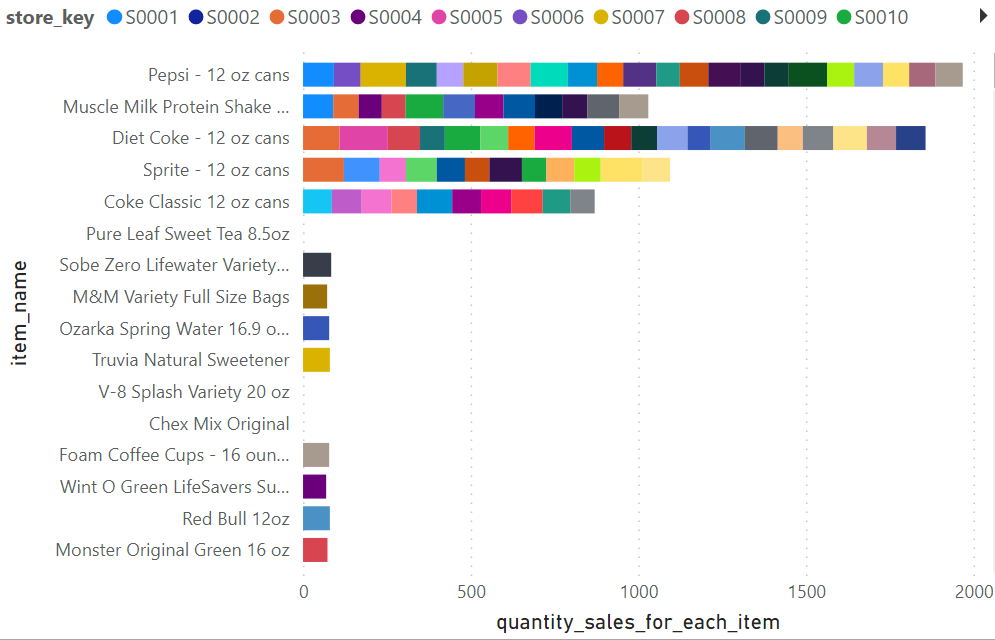

In [123]:
from IPython.display import Image
# stacked bar chart
Image("D:\\Virtual Internship\\Screenshot (1117).png")

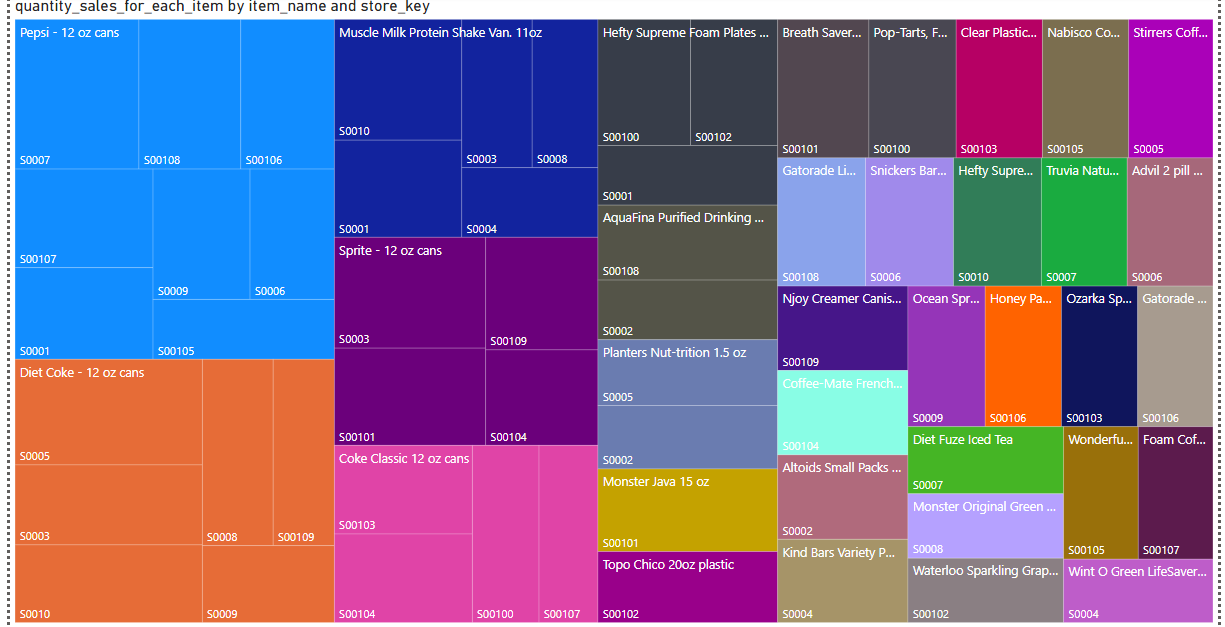

In [127]:
# tree chart
Image("D:\\Virtual Internship\\Screenshot (1118).png")

# Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [134]:
con = PostgresConnection().getConnection()

successfully connected to database


In [144]:
days = int(input('Enter no. of days for the query: '))
con = PostgresConnection().getConnection()
cur = con.cursor()
query = "SELECT i.item_name, trans.trans_type, t.datee "\
"FROM ecomdb.fact_table AS f "\
"JOIN ecomdb.trans_dim AS trans ON trans.payment_key=f.payment_key "\
"JOIN ecomdb.item_dim AS i ON i.item_key=f.item_key "\
"JOIN ecomdb.time_dim AS t ON t.time_key = f.time_key "\
"Where (trans.trans_type='card' or trans.trans_type='mobile') and t.datee > (CURRENT_DATE - integer '{}')".format(days)
cur.execute(query)
result = cur.fetchall()
result

Enter no. of days for the query: 83
successfully connected to database


[('Diet Coke - 12 oz cans', 'card', datetime.datetime(2021, 12, 1, 13, 14)),
 ('Gatorade Lemon Lime 12oz', 'card', datetime.datetime(2021, 12, 1, 13, 14)),
 ('Kleenex Tissue Rectangle Boxes 160/box',
  'card',
  datetime.datetime(2021, 12, 1, 13, 14)),
 ('Breath Savers Peppermints 12/roll ',
  'card',
  datetime.datetime(2021, 12, 1, 18, 15)),
 ('La Croix Sparkling Cran-Raspberry 12 oz',
  'card',
  datetime.datetime(2021, 12, 1, 18, 15)),
 ('Hand Sanitizer Refill Pump',
  'card',
  datetime.datetime(2021, 12, 1, 18, 15)),
 ('Extra Variety Packs Sugar Free',
  'card',
  datetime.datetime(2021, 12, 1, 18, 15)),
 ('Tylenol Extra Strength 2 pill packets',
  'mobile',
  datetime.datetime(2021, 12, 1, 18, 15)),
 ('AquaFina Purified Drinking Water 16oz',
  'card',
  datetime.datetime(2021, 12, 1, 18, 15)),
 ('Deluxe Mixed Nuts with Seasalt',
  'card',
  datetime.datetime(2021, 12, 1, 18, 15)),
 ('Monster Zero Ultra Variety 16 oz',
  'card',
  datetime.datetime(2021, 12, 1, 18, 15)),
 ('Coke 

In [145]:
df = pd.DataFrame(list(records), columns=['item_name', 'trans_type', 'date'])
df = df.dropna()
df

,item_name,trans_type,date
0,S0001,Pepsi - 12 oz cans,92
1,S0001,Muscle Milk Protein Shake Van. 11oz,90
2,S0001,Hefty Supreme Foam Plates 6 inch,78
3,S0001,Waterloo Sparkling Lime 12oz,70
4,S0001,Njoy Sugar Canister 22 oz,69
...,...,...,...
187109,S0099,Kind Bars Mini Variety Pack 0.7 oz,5
187110,S0099,Paper Plates 8.5 inch Ultra Strong,4
187111,S0099,Fuze Iced Tea,4
187112,S0099,Pringles Snak Stacks Variety,3


# Q8: What season(quarter) is the worst for each product item?

 item1-> q1

item2-> q2

In [27]:
con = PostgresConnection().getConnection()

successfully connected to database


In [28]:
cur = con.cursor()
select_stmt = "SELECT new_table.item_name, new_table.quarter, min(total_sales_quantity_for_each_item) as minimum_sales_quantity_for_each_item "\
"FROM(SELECT i.item_name, t.quarter, sum(f.quantity) as total_sales_quantity_for_each_item "\
"FROM ecomdb.fact_table as f "\
"JOIN ecomdb.time_dim as t on t.time_key=f.time_key "\
"JOIN ecomdb.item_dim as i on i.item_key=f.item_key  "\
"GROUP BY (i.item_name, t.quarter) "\
"ORDER BY i.item_name, total_sales_quantity_for_each_item desc) as new_table "\
"GROUP BY (new_table.item_name, new_table.quarter)"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('100% Juice Box Variety 6.75 oz ', 'Q1', 5698),
 ('100% Juice Box Variety 6.75 oz ', 'Q2', 5876),
 ('100% Juice Box Variety 6.75 oz ', 'Q3', 6045),
 ('100% Juice Box Variety 6.75 oz ', 'Q4', 5806),
 ('A&W Root Beer - 12 oz cans', 'Q1', 5965),
 ('A&W Root Beer - 12 oz cans', 'Q2', 5735),
 ('A&W Root Beer - 12 oz cans', 'Q3', 6103),
 ('A&W Root Beer - 12 oz cans', 'Q4', 5820),
 ('A&W Root Beer Diet - 12 oz cans', 'Q1', 6026),
 ('A&W Root Beer Diet - 12 oz cans', 'Q2', 5627),
 ('A&W Root Beer Diet - 12 oz cans', 'Q3', 5940),
 ('A&W Root Beer Diet - 12 oz cans', 'Q4', 5589),
 ('Advil 2 pill packets', 'Q1', 5453),
 ('Advil 2 pill packets', 'Q2', 6001),
 ('Advil 2 pill packets', 'Q3', 5647),
 ('Advil 2 pill packets', 'Q4', 6025),
 ('All Purpose Cleaner 409 Spray', 'Q1', 5325),
 ('All Purpose Cleaner 409 Spray', 'Q2', 5375),
 ('All Purpose Cleaner 409 Spray', 'Q3', 5764),
 ('All Purpose Cleaner 409 Spray', 'Q4', 5890),
 ('Altoids Small Packs Variety', 'Q1', 5730),
 ('Altoids Small Packs Var

In [29]:
worst_quarter_for_each_product_df = pd.DataFrame(list(records), columns=['item_name', 'quarter', 'minimum_sales_quantity_for_each_item'])
worst_quarter_for_each_product_df = worst_quarter_for_each_product_df.dropna()
worst_quarter_for_each_product_df

,item_name,quarter,minimum_sales_quantity_for_each_item
0,100% Juice Box Variety 6.75 oz,Q1,5698
1,100% Juice Box Variety 6.75 oz,Q2,5876
2,100% Juice Box Variety 6.75 oz,Q3,6045
3,100% Juice Box Variety 6.75 oz,Q4,5806
4,A&W Root Beer - 12 oz cans,Q1,5965
...,...,...,...
1031,Yoplait Original Yogurt Variety Pack,Q4,5737
1032,Zoo Animal Cookies/Crackers,Q1,5462
1033,Zoo Animal Cookies/Crackers,Q2,5508
1034,Zoo Animal Cookies/Crackers,Q3,5701


In [30]:
# worst_quarter_for_each_product_df.groupby(['item_name'])[worst_quarter_for_each_product_df.minimum_sales_quantity_for_each_item].min()
# worst_quarter_for_each_product_df['minimum_sales_price_for_each_item'] = worst_quarter_for_each_product_df['minimum_sales_price_for_each_item'].astype(float, errors = 'raise')
worst_quarter_for_each_product_df = worst_quarter_for_each_product_df.set_index('quarter').groupby("item_name")['minimum_sales_quantity_for_each_item'].nsmallest(1).reset_index()
worst_quarter_for_each_product_df

,item_name,quarter,minimum_sales_quantity_for_each_item
0,100% Juice Box Variety 6.75 oz,Q1,5698
1,A&W Root Beer - 12 oz cans,Q2,5735
2,A&W Root Beer Diet - 12 oz cans,Q4,5589
3,Advil 2 pill packets,Q1,5453
4,All Purpose Cleaner 409 Spray,Q1,5325
...,...,...,...
254,Welch's 100% Juice Variety10 oz,Q2,5494
255,Wint O Green LifeSavers Sugar Free,Q1,5323
256,Wonderful Pistachios (in shell),Q1,5578
257,Yoplait Original Yogurt Variety Pack,Q1,5426


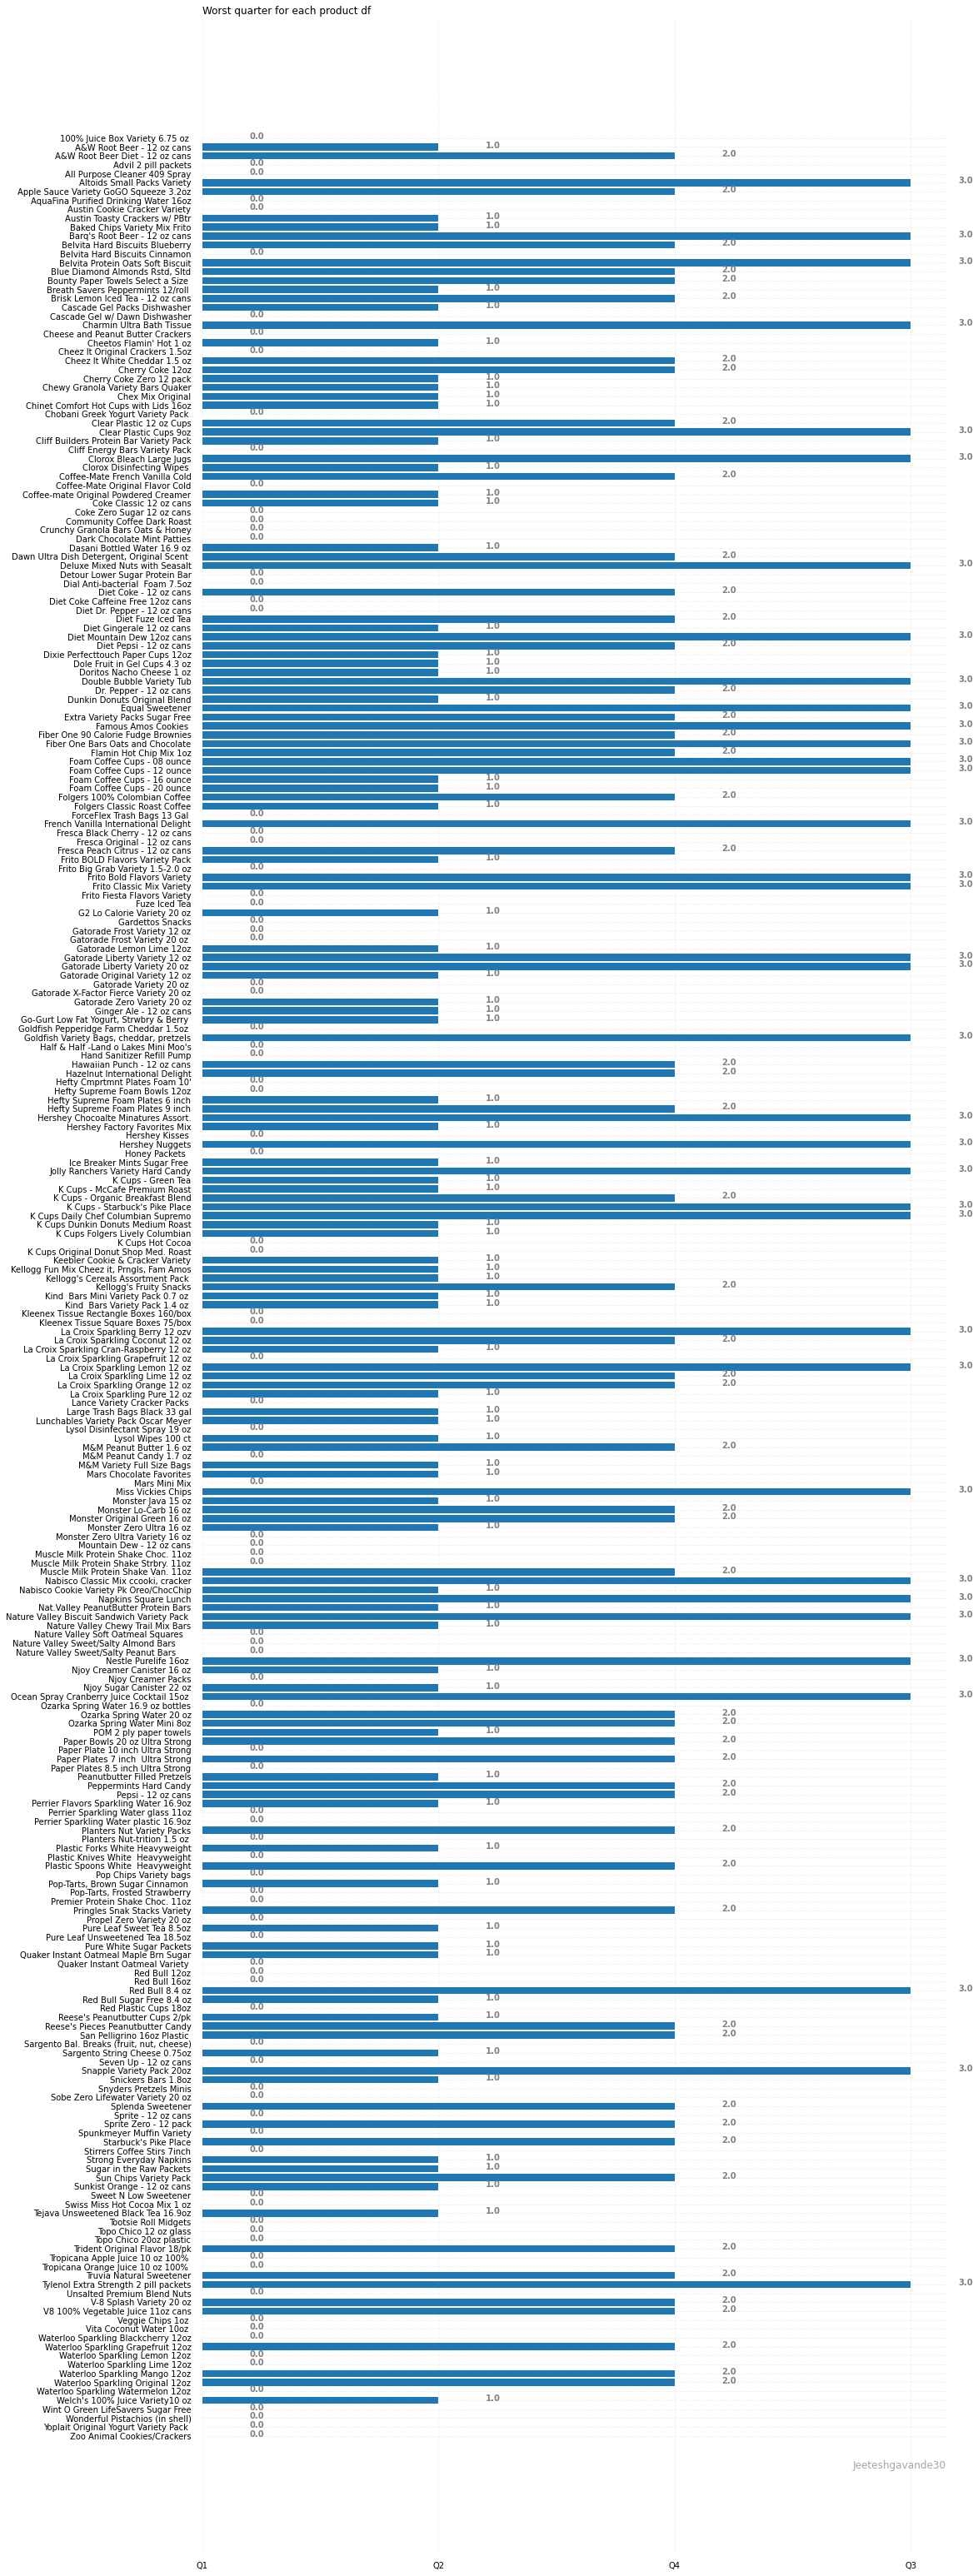

In [31]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 56))
 
# Horizontal Bar Plot
ax.barh(worst_quarter_for_each_product_df['item_name'], worst_quarter_for_each_product_df['quarter'])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Worst quarter for each product df', loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

# Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [32]:
con = PostgresConnection().getConnection()

successfully connected to database


In [33]:
cur = con.cursor()
select_stmt = "SELECT i.item_name, s.division, sum(f.total_price) as total_sales_price_for_each_item "\
"FROM ecomdb.fact_table as f "\
"JOIN ecomdb.store_dim as s on s.store_key=f.store_key "\
"JOIN ecomdb.item_dim as i on i.item_key=f.item_key  "\
"GROUP BY (i.item_name, s.division) "\
"ORDER BY i.item_name, total_sales_price_for_each_item desc"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('100% Juice Box Variety 6.75 oz ', 'DHAKA', Decimal('141195.00')),
 ('100% Juice Box Variety 6.75 oz ', 'CHITTAGONG', Decimal('64950.00')),
 ('100% Juice Box Variety 6.75 oz ', 'RAJSHAHI', Decimal('38730.00')),
 ('100% Juice Box Variety 6.75 oz ', 'KHULNA', Decimal('37755.00')),
 ('100% Juice Box Variety 6.75 oz ', 'RANGPUR', Decimal('26685.00')),
 ('100% Juice Box Variety 6.75 oz ', 'BARISAL', Decimal('23790.00')),
 ('100% Juice Box Variety 6.75 oz ', 'SYLHET', Decimal('18270.00')),
 ('A&W Root Beer - 12 oz cans', 'DHAKA', Decimal('107479.00')),
 ('A&W Root Beer - 12 oz cans', 'CHITTAGONG', Decimal('52060.50')),
 ('A&W Root Beer - 12 oz cans', 'KHULNA', Decimal('28382.00')),
 ('A&W Root Beer - 12 oz cans', 'RAJSHAHI', Decimal('27795.50')),
 ('A&W Root Beer - 12 oz cans', 'RANGPUR', Decimal('21597.00')),
 ('A&W Root Beer - 12 oz cans', 'BARISAL', Decimal('19101.50')),
 ('A&W Root Beer - 12 oz cans', 'SYLHET', Decimal('15249.00')),
 ('A&W Root Beer Diet - 12 oz cans', 'DHAKA', Decimal

In [34]:
division_wise_total_sale_for_each_product_df = pd.DataFrame(list(records), columns=['item_name', 'division', 'total_sales_price_for_each_item'])
division_wise_total_sale_for_each_product_df = division_wise_total_sale_for_each_product_df.dropna()
division_wise_total_sale_for_each_product_df

,item_name,division,total_sales_price_for_each_item
0,100% Juice Box Variety 6.75 oz,DHAKA,141195.00
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.00
2,100% Juice Box Variety 6.75 oz,RAJSHAHI,38730.00
3,100% Juice Box Variety 6.75 oz,KHULNA,37755.00
4,100% Juice Box Variety 6.75 oz,RANGPUR,26685.00
...,...,...,...
1808,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.00
1809,Zoo Animal Cookies/Crackers,KHULNA,35434.00
1810,Zoo Animal Cookies/Crackers,RANGPUR,25186.00
1811,Zoo Animal Cookies/Crackers,BARISAL,24178.00


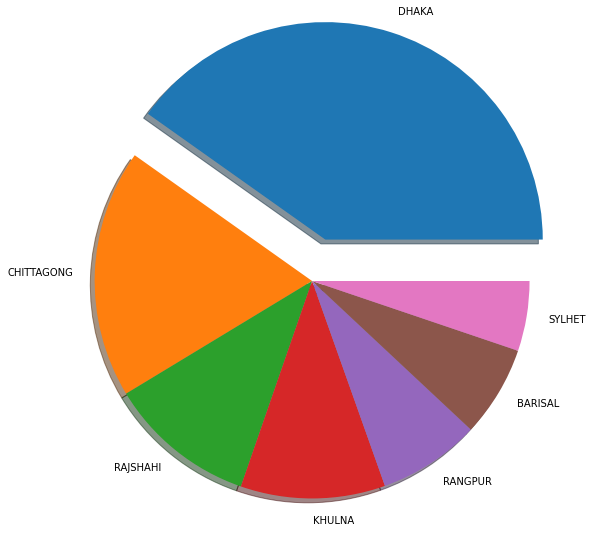

In [37]:
# for the first item '100% Juice Box Variety 6.75 oz' the total sale price in each division is shown below
y = division_wise_total_sale_for_each_product_df.total_sales_price_for_each_item.values[0:7]
mylabels = division_wise_total_sale_for_each_product_df.division.values[0:7]
myexplode = [0.2, 0, 0, 0, 0, 0, 0]
fig, ax = plt.subplots(figsize =(10, 10))
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

For the item named 100% Juice Box Variety 6.75 oz the total sale price is highest in Dhaka Division which is 141195.00

# Q10: What are the average sales of products sales per store monthly?

     S1->M1-> avg_sales

     s1-> M2 -> avg_sales

In [96]:
con = PostgresConnection().getConnection()

successfully connected to database


In [97]:
cur = con.cursor()
select_stmt = '''SELECT s.store_key, t.month, avg(f.total_price) as average_total_price
FROM ecomdb.fact_table as f
JOIN ecomdb.time_dim as t on t.time_key = f.time_key 
JOIN ecomdb.store_dim as s on s.store_key = f.store_key 
GROUP BY(s.store_key, t.month)    
ORDER BY(s.store_key)'''
cur.execute(select_stmt)
records = cur.fetchall()
records


[('S0001', 1, Decimal('97.7543103448275862')),
 ('S0001', 2, Decimal('100.5776699029126214')),
 ('S0001', 3, Decimal('109.4158878504672897')),
 ('S0001', 4, Decimal('98.8805309734513274')),
 ('S0001', 5, Decimal('99.5245535714285714')),
 ('S0001', 6, Decimal('101.2459349593495935')),
 ('S0001', 7, Decimal('103.9189189189189189')),
 ('S0001', 8, Decimal('105.1269531250000000')),
 ('S0001', 9, Decimal('96.1901041666666667')),
 ('S0001', 10, Decimal('104.6166666666666667')),
 ('S0001', 11, Decimal('103.8355855855855856')),
 ('S0001', 12, Decimal('107.8697478991596639')),
 ('S0002', 1, Decimal('98.2902684563758389')),
 ('S0002', 2, Decimal('106.3849557522123894')),
 ('S0002', 3, Decimal('102.7565217391304348')),
 ('S0002', 4, Decimal('104.0798969072164948')),
 ('S0002', 5, Decimal('109.1587591240875912')),
 ('S0002', 6, Decimal('100.9268867924528302')),
 ('S0002', 7, Decimal('95.6513157894736842')),
 ('S0002', 8, Decimal('108.9462809917355372')),
 ('S0002', 9, Decimal('104.7039473684210526

In [98]:
avg_sales_per_store_monthly_df = pd.DataFrame(list(records), columns=['store_key', 'month', 'average_total_price'])
avg_sales_per_store_monthly_df = avg_sales_per_store_monthly_df.dropna()
avg_sales_per_store_monthly_df

,store_key,month,average_total_price
0,S0001,1,97.7543103448275862
1,S0001,2,100.5776699029126214
2,S0001,3,109.4158878504672897
3,S0001,4,98.8805309734513274
4,S0001,5,99.5245535714285714
...,...,...,...
8707,S0099,8,96.2933673469387755
8708,S0099,9,114.1365740740740741
8709,S0099,10,102.7897727272727273
8710,S0099,11,107.3810679611650485


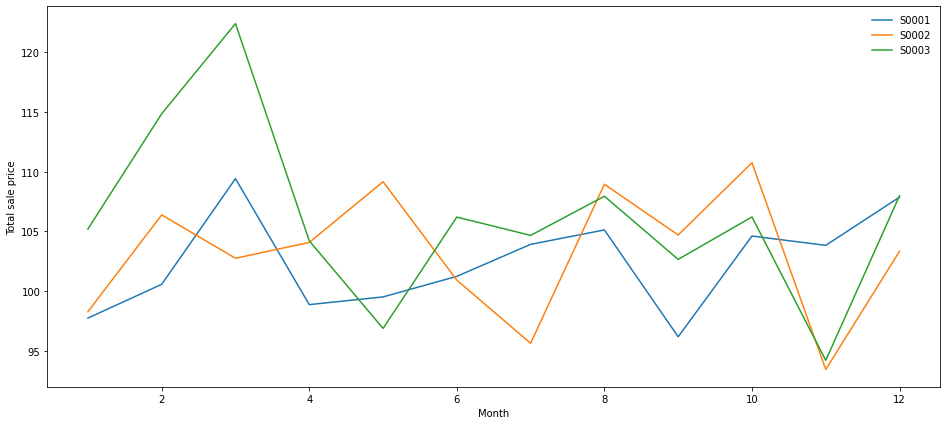

In [99]:
# two lines by specifiyng the x- and y-point values for both lines
x1 = x2 = x3 = avg_sales_per_store_monthly_df.month.values[:12]
y1 = avg_sales_per_store_monthly_df.average_total_price.values[0:12]
y2 = avg_sales_per_store_monthly_df.average_total_price.values[12:24] 
y3 = avg_sales_per_store_monthly_df.average_total_price.values[24:36]

fig, ax = plt.subplots(figsize =(16, 7))
plt.plot(x1, y1, label='S0001')
plt.plot(x2, y2, label='S0002')
plt.plot(x3, y3, label='S0003')
leg = plt.legend(loc='upper right', frameon=False);
plt.xlabel("Month")
plt.ylabel("Total sale price")
plt.show()

From the line, it has been shown that,
   
   for S0001, the highest total sales is in the 3rd month

   for S0002, the highest total sales is in the 10th month

   for S0003, the highest total sales is in the 3rd month